<a href="https://colab.research.google.com/github/i4ata/NN_TBP/blob/main/data_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data generator

Say "Yess" if you see this.

In [ ]:
import time

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
step = 0.001
max_t = 5
M = [1,1,1]
G = 1

In [ ]:
def computeAcceleration(x,y,M,ax,ay,G):
    for j in range(3):

        dx = np.array(x[j] - x).transpose()
        dy = np.array(y[j] - y).transpose()

        d = np.power(np.sqrt( np.power(dx,2) + np.power(dy,2)),3)
        
        for k in range(3):
            if d[k] == 0:
                ax[k,j] = 0
                ay[k,j] = 0
            else:
                ax[k,j] = -dx[k]*M[k]*G / d[k]
                ay[k,j] = -dy[k]*M[k]*G / d[k]

        ax_tot = np.sum(ax, axis=0)
        ay_tot = np.sum(ay, axis=0)

    return ax_tot, ay_tot

In [ ]:
def euler_method(max_t = 5, step = 0.001, M = [1,1,1], G = 1, x1 = 0, y1 = 0, vx1 = 0, vy1 = 0, x2 = 0, y2 = 0, vx2 = 0, vy2 = 0, x3 = 0, y3 = 0, vx3 = 0, vy3 = 0):
    t = np.arange(0,max_t,step)
    
    x = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')
    y = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')

    vx = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')
    vy = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')

    ax = np.array([[0 for x in range(3)] for y in range(3)], dtype='f')
    ay = np.array([[0 for x in range(3)] for y in range(3)], dtype='f')

    x[0][0] = x1
    x[0][1] = x2
    x[0][2] = x3 

    y[0][0] = y1
    y[0][1] = y2
    y[0][2] = y3

    vx[0][0] = vx1
    vx[0][1] = vx2
    vx[0][2] = vx3 

    vy[0][0] = vy1
    vy[0][1] = vy2
    vy[0][2] = vy3 

    for i in range(len(t)-1):
        ax_tot, ay_tot = computeAcceleration(x[i], y[i], M, ax, ay, G)

        x[i+1] = x[i] + step*vx[i]
        y[i+1] = y[i] + step*vy[i]

        vx[i+1] = vx[i] + step*ax_tot
        vy[i+1] = vy[i] + step*ay_tot

    return x, y

In [ ]:
def verlet_method(max_t = 5, step = 0.001, M = [1,1,1], G = 1, x1 = 0, y1 = 0, vx1 = 0, vy1 = 0, x2 = 0, y2 = 0, vx2 = 0, vy2 = 0, x3 = 0, y3 = 0, vx3 = 0, vy3 = 0):
    t = np.arange(0,max_t,step)
    
    x = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')
    y = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')

    vx = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')
    vy = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')

    ax = np.array([[0 for x in range(3)] for y in range(3)], dtype='f')
    ay = np.array([[0 for x in range(3)] for y in range(3)], dtype='f')

    x[0][0] = x1
    x[0][1] = x2
    x[0][2] = x3 

    y[0][0] = y1
    y[0][1] = y2
    y[0][2] = y3

    vx[0][0] = vx1
    vx[0][1] = vx2
    vx[0][2] = vx3 

    vy[0][0] = vy1
    vy[0][1] = vy2
    vy[0][2] = vy3 

    for i in range(len(t)-1):
        ax_tot, ay_tot = computeAcceleration(x[i], y[i], M, ax, ay, G)

        x[i+1] = x[i] + step*vx[i] + (ax_tot * step * step)/2
        y[i+1] = y[i] + step*vy[i] + (ay_tot * step * step)/2

        ax_tot_next, ay_tot_next = computeAcceleration(x[i+1], y[i+1], M, ax, ay, G)

        vx[i+1] = vx[i] + step * (ax_tot + ax_tot_next) / 2
        vy[i+1] = vy[i] + step * (ay_tot + ay_tot_next) / 2

    return x, y

In [ ]:
def plot(x,y):
    Body1, = plt.plot(x[:,0], y[:,0], color = 'green')
    Body2, = plt.plot(x[:,1], y[:,1], color = 'blue')
    Body3, = plt.plot(x[:,2], y[:,2], color = 'red')
    plt.scatter(x[0][0], y[0][0], color = 'green')
    plt.scatter(x[0][1], y[0][1], color = 'blue')
    plt.scatter(x[0][2], y[0][2], color = 'red')
    plt.grid()
    plt.xlim(np.amin(x) - 0.2, np.amax(x) + 0.2)
    plt.ylim(np.amin(y) - 0.2, np.amax(y) + 0.2)
    #plt.xlim(-3,3)
    #plt.ylim(-3,3)

    plt.title("2D TBP for " + str(len(x)) + " time steps using euler method")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend([Body1, Body2, Body3],['Body 1','Body 2','Body 3'])
    plt.show()

In [ ]:
def get_random_positions():
    return np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1)

def get_random_velocities():
    return np.random.uniform(-0.5,0.5), np.random.uniform(-0.5,0.5), np.random.uniform(-0.5,0.5), np.random.uniform(-0.5,0.5), np.random.uniform(-0.5,0.5), np.random.uniform(-0.5,0.5)


In [ ]:
def get_random_position(sector):
    theta = np.random.uniform(2*sector*math.pi/3,2*(sector+1)*math.pi/3)
    r = np.random.uniform(1.5,2)
    return math.cos(theta)*r, math.sin(theta)*r

def get_random_velocity():
    return np.random.choice( [np.random.uniform(-1,-0.3) , np.random.uniform(0.3,1)] ), np.random.choice( [np.random.uniform(-1,-0.3) , np.random.uniform(0.3,1)] )


This cell calculates the energy of the system

In [ ]:
def get_kinetic_energy(mass, v1, v2):
    velocity = np.sqrt(v1*v1 + v2*v2)
    return mass*velocity*velocity/2

def get_potential_energy(x1, y1, m1, x2, y2, m2, G):
    distance = np.sqrt((y2-y1)*(y2-y1) + (x2-x1)*(x2-x1))
    return G*m1*m2/distance

def get_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3, M, G):
    total_kinetic =  get_kinetic_energy(M[0],vx1,vy1) + get_kinetic_energy(M[1],vx2,vy2) + get_kinetic_energy(M[2],vx3,vy3)
    total_potential = get_potential_energy(x1,y1,M[0],x2,y2,M[1],G) + get_potential_energy(x1,y1,M[0],x3,y3,M[2],G) + get_potential_energy(x2,y2,M[1],x3,y3,M[2],G)
    return total_kinetic - total_potential


This intializes the positions as random values between -3 and 3, and the velocities as random values between -1 and 1

In [ ]:
x1, y1, x2, y2, x3, y3 = get_random_positions()
vx1, vy1, vx2, vy2, vx3, vy3 = get_random_velocities()

This initializes the positions as random points in polar coordinates with radii between 1 and 3, and theta θ depending on the argument, where 0 means that θ is between 0 and 2π/3, 1 means that θ is between 2π/3 and 4π/3, and 2 means that θ is between 4π/3 and 2π BEST THING SO FAR

In [ ]:
x1,y1 = get_random_position(0)
x2,y2 = get_random_position(1)
x3,y3 = get_random_position(2)

#vx1,vy1 = get_random_velocity()
#vx2,vy2 = get_random_velocity()
#vx3,vy3 = get_random_velocity()
vx1, vy1, vx2, vy2, vx3, vy3 = get_random_velocities()

This is the given intial position in the Matlab file on nestor

In [ ]:
x1 = 0
y1 = 1

x2 = -x1 
y2 = -y1  

x3 = 0 
y3 = 0 

vx1 =  0.3471 
vy1 =  0.5327  

vx2 = vx1
vy2 = vy1

vx3 = -2*vx1 
vy3 = -2*vy1 

This is exactly how Breen et al set up the intial conditions. There, the first body is fixed at [1,0]. The second body is anywhere in the unit semi-circle, where x < 0 and the third body is given such that [0,0] is the barycenter of the triangle given by the three bodies. All initial velocities are 0

In [ ]:
x1 = 1
y1 = 0

vx1=vy1=vx2=vy2=vx3=vy3=0

theta = np.random.uniform(math.pi/2, 3*math.pi/2)
r = np.random.uniform(0,1)
x2 = math.cos(theta)*r
y2 = math.sin(theta)*r
x3 = -x2-x1
y3 = -y2-y1

This cell runs the verlet method

In [ ]:
x,y = verlet_method(max_t, step, M, G, x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3)

This cell runs euler method

In [ ]:
x,y = euler_method(max_t, step, M, G, x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3)

This cell plots the results


Positions:
Body 1: 1, 0
Body 2: -0.39463778604598865, -0.0753808666844586
Body 3: -0.6053622139540114, 0.0753808666844586

Velocities:
Body 1: 0, 0
Body 2: 0, 0
Body 3: 0, 0

Total energy of the system: -5.197696569617532


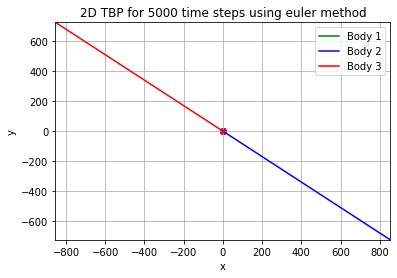

In [ ]:
print("\nPositions:")
print("Body 1: " + str(x1) + ", " + str(y1))
print("Body 2: " + str(x2) + ", " + str(y2))
print("Body 3: " + str(x3) + ", " + str(y3) + "\n")

print("Velocities:")
print("Body 1: " + str(vx1) + ", " + str(vy1))
print("Body 2: " + str(vx2) + ", " + str(vy2))
print("Body 3: " + str(vx3) + ", " + str(vy3) + "\n")

print("Total energy of the system: " + str(get_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3, M, G)))
plot(x,y)